In [ ]:
import numpy as np
import pandas as pd
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import utils.engine as ue
import utils.visualizer as uv

In [ ]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [ ]:
plt.rcParams["animation.html"] = "jshtml"

In [ ]:
with open("Validation/SHEBA_Data/01-forcing.dat") as file:
    arr = file.readlines()
    
cols_1 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_1 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
with open("Validation/SHEBA_Data/02-hs-hi_thickness.dat") as file:
    arr = file.readlines()
    
cols_2 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_2 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
with open("Validation/SHEBA_Data/06-depth_pit.dat") as file:
    arr = file.readlines()
    
file_6 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])
file_6[:, 0] = np.round(file_6[:, 0], 4)

In [ ]:
with open("Validation/SHEBA_Data/07-pit_fcond.dat") as file:
    arr = file.readlines()
    
cols_7 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_7 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
with open("Validation/SHEBA_Data/08-tocn.dat") as file:
    arr = file.readlines()
    
file_8 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
with open("Validation/SHEBA_Data/09-focn.dat") as file:
    arr = file.readlines()
    
cols_9 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_9 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
with open("Validation/SHEBA_Data/10-temp.dat") as file:
    arr = file.readlines()
    
file_10 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
with open("Validation/SHEBA_Data/11-turbflux.dat") as file:
    arr = file.readlines()
    
cols_11 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_11 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
data = pd.DataFrame(file_1, columns=cols_1)

data_2 = pd.DataFrame(file_2, columns=cols_2)
data = data.merge(data_2.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_2['jday']*1000).astype('int32')).iloc[:, 1:]

data_6 = pd.DataFrame(file_6, columns=['jday', 'hs', 'hi', 'hs_level', 'hf_level', 'hi_level'])
data = data.merge(data_6.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_6['jday']*1000).astype('int32')).iloc[:, 1:]

data_7 = pd.DataFrame(file_7, columns=cols_7)
data = data.merge(data_7.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_7['jday']*1000).astype('int32')).iloc[:, 1:]

data_8 = pd.DataFrame(file_8, columns=['jday', 'Tocn'])
data = data.merge(data_8.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_8['jday']*1000).astype('int32')).iloc[:, 1:]

data_9 = pd.DataFrame(file_9, columns=cols_9)
data = data.merge(data_9.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_9['jday']*1000).astype('int32')).iloc[:, 1:]

data_10 = pd.DataFrame(file_10, columns=['jday'] + ['T_{}'.format(i) for i in range(1, 51)])
data = data.merge(data_10.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_10['jday']*1000).astype('int32')).iloc[:, 1:]

data_11 = pd.DataFrame(file_11, columns=cols_11)
data = data.merge(data_11.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_11['jday']*1000).astype('int32')).iloc[:, 1:]

In [ ]:
# data.to_csv('Validation/full_data.csv', index=False)

In [ ]:
with open("Validation/SHEBA_Data/12-levels.dat") as file:
    Z = [float(z.replace(' ', '')[:-1]) for z in file.readlines()]

In [ ]:
data = pd.read_csv('Validation/full_data.csv')

In [ ]:
data.columns

Выводы:
1. hs_level и hs_best почему-то не равны
2. hi_x, hi_y не равны, также как и hs_x и hs_y
3. Focn_x, Focn_y и focn_pit не равны

In [ ]:
data

In [ ]:
data[['Focn_x', 'Focn_y', 'focn_pit']].plot(figsize=(15, 10), grid=True)

In [ ]:
data[['hs_x', 'hs_y', 'hs_level', 'hs_best']].plot(figsize=(15, 10), grid=True)

In [ ]:
data[['hi_x', 'hi_y', 'hi_level', 'hi_best']].plot(figsize=(15, 10), grid=True)

In [ ]:
(data['Tis'] - data['Tss']).plot(figsize=(15, 10), grid=True)

In [11]:
prec = 5.
cmap_base = plt.get_cmap('rainbow')
vmin = data.loc[:, 'T_1':'T_50'].values.min()
vmax = data.loc[:, 'T_1':'T_50'].values.max()

boundaries = np.concatenate(([vmin], np.arange(np.floor(vmin + prec), vmax, prec), [vmax]))
centers = (boundaries[1:] + boundaries[:-1])/2
centers_scaled = (centers - vmin) / (vmax - vmin)

cmap_custom = clr.ListedColormap([cmap_base(x) for x in centers_scaled])
norm_custom = clr.BoundaryNorm(boundaries, cmap_custom.N)

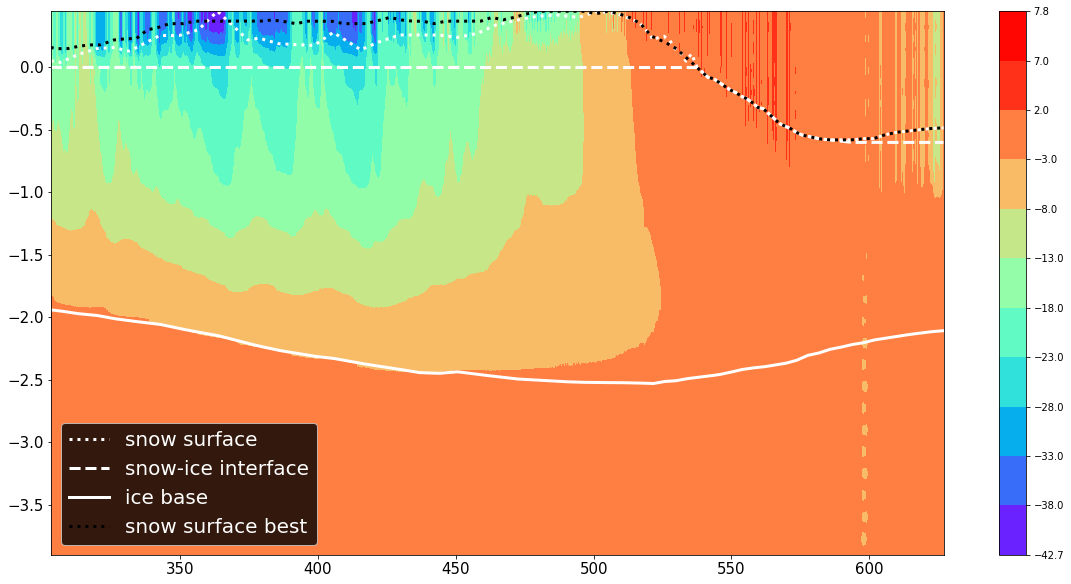

In [12]:
plt.figure(figsize=(20, 10))
plt.imshow(data.loc[:, 'T_1':'T_50'].T,
           aspect='auto', cmap=cmap_custom, norm=norm_custom,
           extent=[data.loc[0, 'jday'], data.loc[data.index[-1], 'jday'], Z[-1], Z[0]])
plt.plot(data['jday'], data['hs_level'], color='white', lw=3, ls=':', label='snow surface')
plt.plot(data['jday'], data['hf_level'], color='white', lw=3, ls='--', label='snow-ice interface')
plt.plot(data['jday'], data['hi_level'], color='white', lw=3, label='ice base')
plt.plot(data['jday'], data['hs_best'], color='black', lw=3, ls=':', label='snow surface best')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(loc='lower left', facecolor='black', labelcolor='white', prop={'size': 20})
plt.colorbar(ticks=boundaries)
plt.savefig('test-image.png', dpi=150)
plt.show()

Судя по статье (Fig.5 (a), (b)), чёрные точки - это метод приближения, использованный в статье Хувальда

In [ ]:
test_proc = ue.process_from_data(Z, data.loc[:, 'T_1':'T_50'].values, data['Tss'].values, data['Tis'].values,
                     data['hi_best'].values, data['hf_best'].values, data['hs_best'].values,
                     np.ones(20)/20.0, np.ones(5)/5.0,
                     data['jday'].values, ue.rho_i)

In [ ]:
test_anim = uv.animate([test_proc], ue.rho_w, ue.rho_s, clip_start=4000)

In [ ]:
test_anim

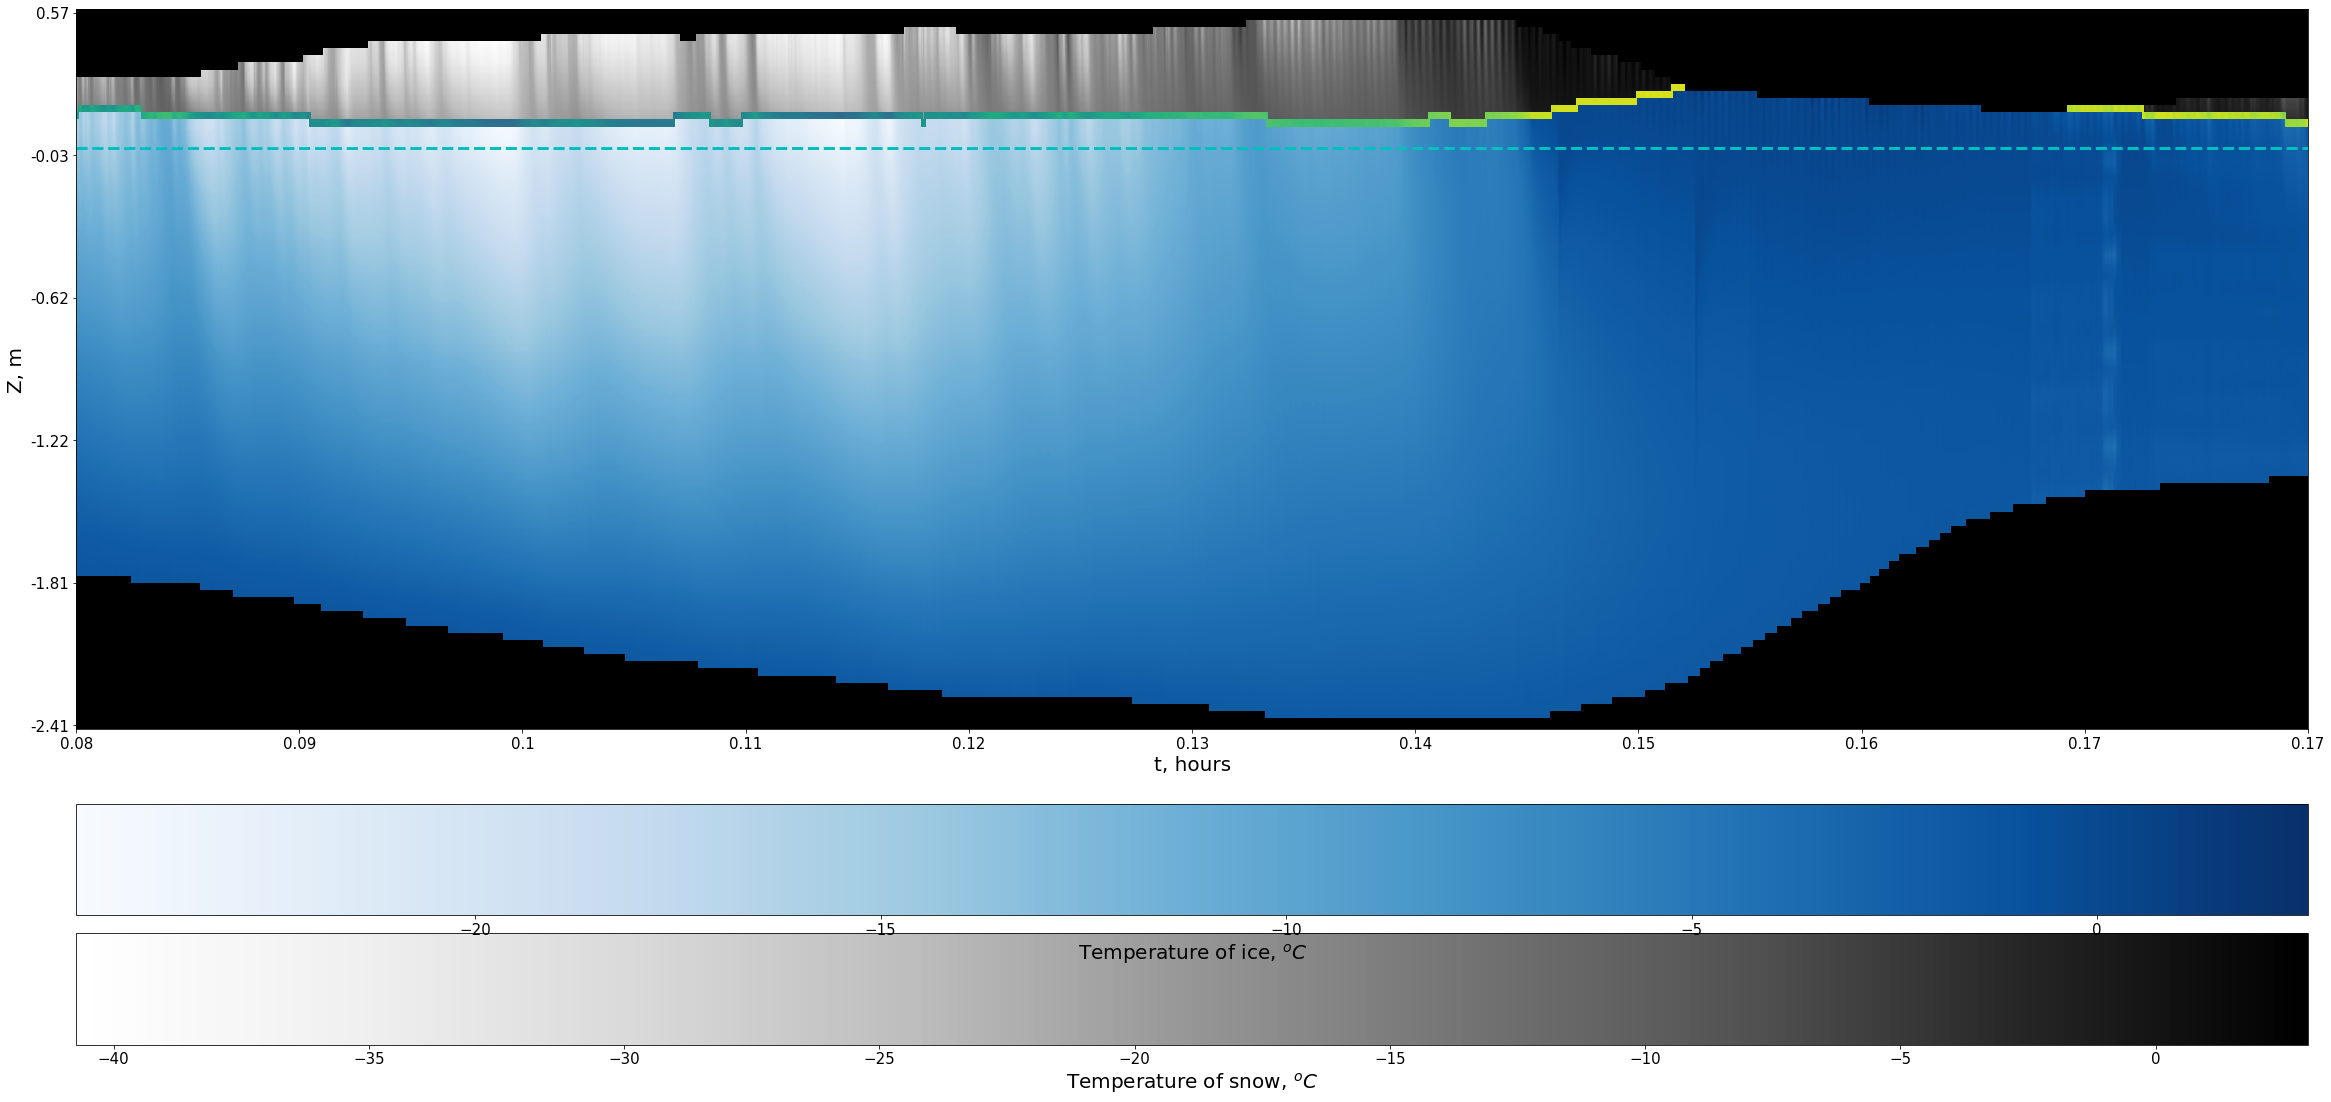

In [16]:
uv.timeseries_img(test_proc, ue.rho_w, ue.rho_s, y_points=100)#, savepath='timeseries.png')

In [ ]:
mesh_Z = np.array([Z]*data.shape[0])

In [ ]:
inds_ib = np.searchsorted([-z for z in Z], -data['hi_best'])
inds_is = np.searchsorted([-z for z in Z], -data['hf_best'], side='right')

has_snow = (abs(data['hs_best'] - data['hi_best']) > 1e-3).values

Tib_interp = [(data[ind-1]*(Z[ind] - z_i) + data[ind]*(z_i - Z[ind-1])) / (Z[ind] - Z[ind-1]) \
              for z_i, Z, data, ind \
              in zip(data['hi_best'], mesh_Z, data.loc[:, 'T_1': 'T_50'].itertuples(index=False), inds_ib)]

Tis_interp = [(data[ind-1]*(Z[ind] - z_f) + data[ind]*(z_f - Z[ind-1])) / (Z[ind] - Z[ind-1]) \
              if snow else Tis 
              for z_f, Tis, snow, Z, data, ind \
              in zip(data['hf_best'], data['Tis'], has_snow,
                     mesh_Z, data.loc[:, 'T_1': 'T_50'].itertuples(index=False), inds_is)]

In [ ]:
filter_ice = (data[['hi_best']].values < mesh_Z) & (mesh_Z < data[['hf_best']].values)
filter_snow = (data[['hf_best']].values < mesh_Z) & (mesh_Z < data[['hs_best']].values)

In [ ]:
Z_ice = [np.concatenate(([surf], line_ice[filt_ice], [base])) \
         for surf, line_ice, filt_ice, base \
         in zip(data['hf_best'], mesh_Z, filter_ice, data['hi_best'])]
Z_snow = [np.concatenate(([surf], line_snow[filt_snow], [base])) \
          for surf, line_snow, filt_snow, base \
          in zip(data['hs_best'], mesh_Z, filter_snow, data['hf_best'])]

In [ ]:
temp_ice = [np.concatenate(([surf], line_ice[filt_ice], [base])) \
            for surf, line_ice, filt_ice, base \
            in zip(Tis_interp, data.loc[:, 'T_1':'T_50'].values, filter_ice, Tib_interp)]
temp_snow = [np.concatenate(([surf], line_ice[filt_ice], [base])) \
             for surf, line_ice, filt_ice, base \
             in zip(data['Tss'], data.loc[:, 'T_1':'T_50'].values, filter_snow, Tis_interp)]

In [ ]:
Z_ice[0]

In [ ]:
dsigma_ice = np.ones(20)/20.0
sigma_nodes = np.concatenate(([0.0], dsigma_ice.cumsum()))
sigma_centers = (sigma_nodes[:-1] + sigma_nodes[1:])/2
Z_points = Z_ice[0][-1] + sigma_centers*(Z_ice[0][0] - Z_ice[0][-1])
T_points = np.interp(Z_points, Z_ice[0][::-1], temp_ice[0][::-1])

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(Z_ice[0], temp_ice[0], label='data')
plt.plot(Z_points, T_points, label='interpolation')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data['Tis'], label='from data')
plt.plot(Tis_interp, label='interpolated + data (when no snow)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
data.loc[:, ['jday', 'Tss', 'Tis', 'Tib'] + ['T_{}'.format(i) for i in range(1, 51)]]

In [ ]:
ind=6000

plt.figure(figsize=(15, 10))
plt.plot(data.loc[ind, 'T_1':'T_50'], mesh_Z[ind])
plt.scatter([data.loc[ind, 'Tib'], data.loc[ind, 'Tis'], data.loc[ind, 'Tss']],
            [data.loc[ind, 'hi_best'], data.loc[ind, 'hf'], data.loc[ind, 'hs_best']])
plt.scatter([Tib_interp[ind], Tis_interp[ind]],
            [data.loc[ind, 'hi_best'], data.loc[ind, 'hf_best']], color='red')
plt.grid()
plt.show()